In [1]:
import rasterio as rio
import numpy as np
from glob import glob
import pandas as pd
import numpy as np
from numpy.fft import fft2, ifft2, fftfreq, fftshift
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, shift
from scipy.stats import pearsonr
from scipy import interpolate
from os.path import join, basename

In [2]:
from interpolate import grid_interpolate
from rotation_crop import find_best_rotated
from spectrum_analysis import azimuthalAverage

/bsuscratch/zacharykeskinen/data/uavsar/images/Utica, MT
/bsuscratch/zacharykeskinen/data/uavsar/images/Eldorado National Forest, CA
/bsuscratch/zacharykeskinen/data/uavsar/images/Donner Memorial State Park, CA
/bsuscratch/zacharykeskinen/data/uavsar/images/Rocky Mountains NP, CO
/bsuscratch/zacharykeskinen/data/uavsar/images/Grand Mesa, CO
/bsuscratch/zacharykeskinen/data/uavsar/images/Sierra National Forest, CA
/bsuscratch/zacharykeskinen/data/uavsar/images/Fraser, CO
/bsuscratch/zacharykeskinen/data/uavsar/images/Peeler Peak, CO
/bsuscratch/zacharykeskinen/data/uavsar/images/Silver City, ID
/bsuscratch/zacharykeskinen/data/uavsar/images/Ironton, CO
/bsuscratch/zacharykeskinen/data/uavsar/images/Los Alamos, NM


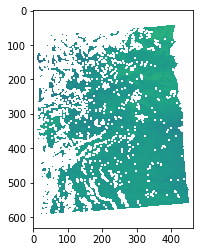

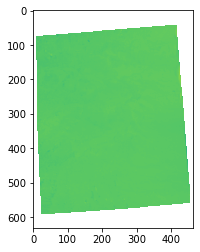

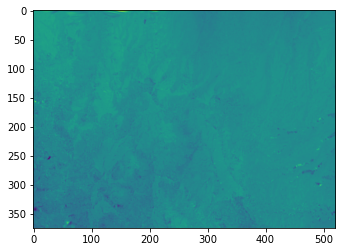

/bsuscratch/zacharykeskinen/data/uavsar/images/Lowman, CO
/bsuscratch/zacharykeskinen/data/uavsar/images/Salt Lake City, UT


In [32]:
locs = glob(join('/bsuscratch/zacharykeskinen/data/uavsar/images/','*'))
for loc in locs:
        print(loc)
        pairs = glob(join(loc, '*'))
        pair = [p for p in pairs if basename(p) != 'tmp'][0]
        images = glob(join(pair, '*'))
        images = [i for i in images if 'unw' in i]
        if images:
            image = images[0]
            with rio.open(image) as src:
                image = src.read(1)[::10,::10]
            nan_nonint = np.sum(np.isnan(image))
            interp_image = grid_interpolate(image)
            nan_int = np.sum(np.isnan(interp_image))
            number_filled = nan_nonint - nan_int
            best, angle = find_best_rotated(interp_image)

            if number_filled/best.size < 0.1:
                plt.imshow(image)
                plt.show()
                plt.imshow(interp_image)
                plt.show()
                plt.imshow(best)
                plt.show()
                a = best

In [29]:
number_filled

22703

In [30]:
image.size

334377

In [27]:
(nan_nonint - nan_int)/image.size

0.06789641632050052

In [17]:
a = best

Text(0.5, 0, 'Cycles per Km')

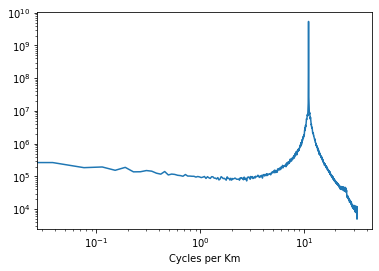

In [18]:
A2d = np.fft.fftshift(np.abs(np.fft.fft2(a))**2)
A1d = azimuthalAverage(A2d)
pixel_spacing = 0.0000555600 #degree/pixel
pixel_spacing = pixel_spacing * 111 # kilometers/ pixel
pixel_spacing = pixel_spacing*10 #resampled
fn = 1/ (pixel_spacing/2)
f = np.linspace(0, fn, A1d.size)
plt.plot(f, A1d)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Cycles per Km')

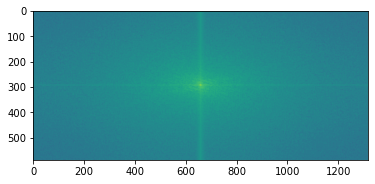

In [19]:
plt.imshow(np.log(A2d))

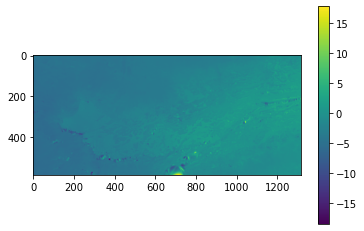

In [20]:
plt.imshow(a)
plt.colorbar()